# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

1.1-1.3

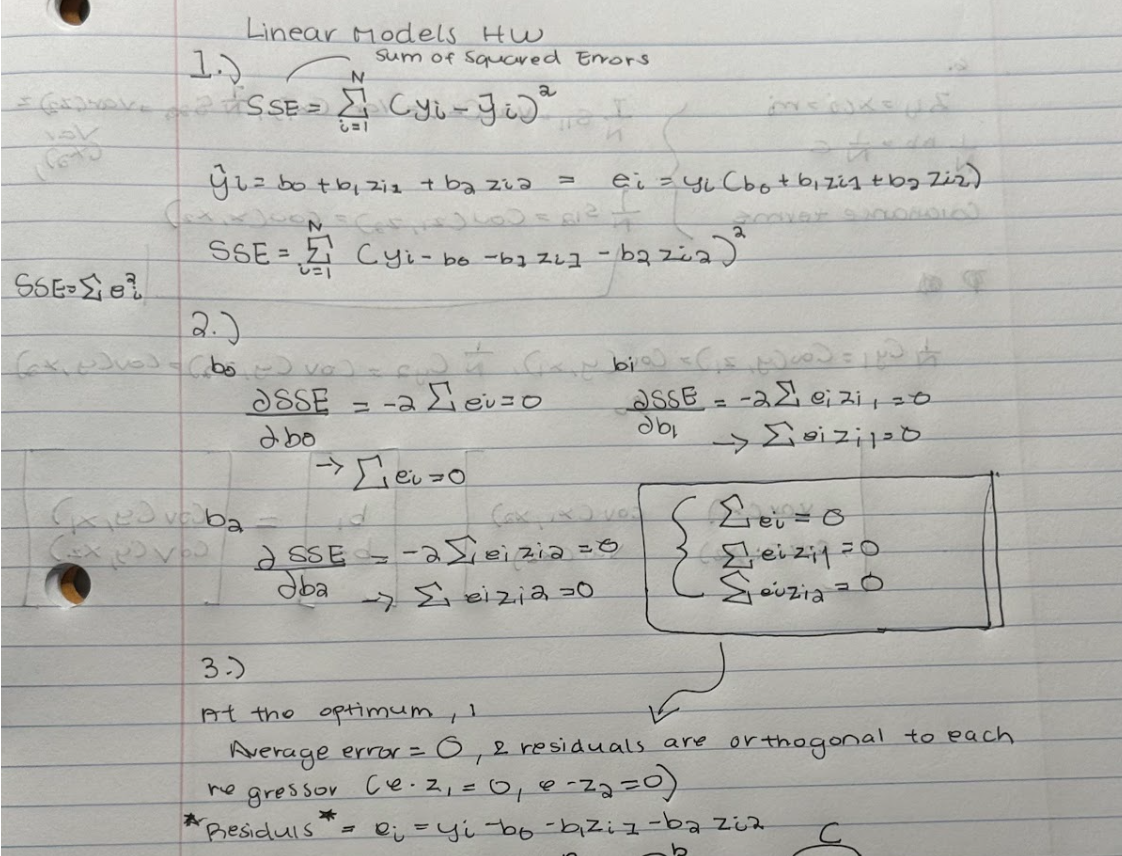

# 1.4-1.5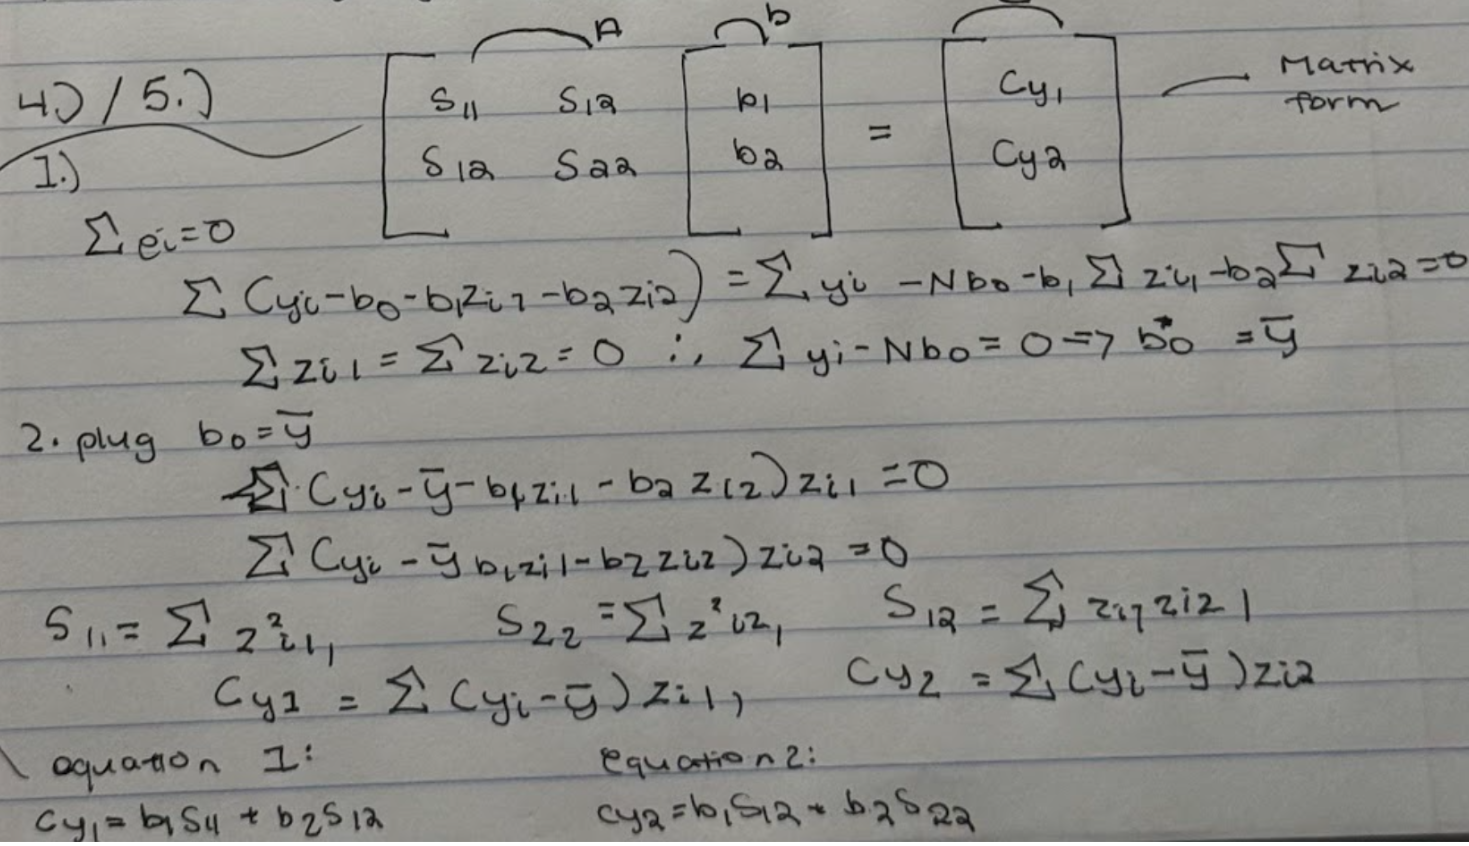-



1.6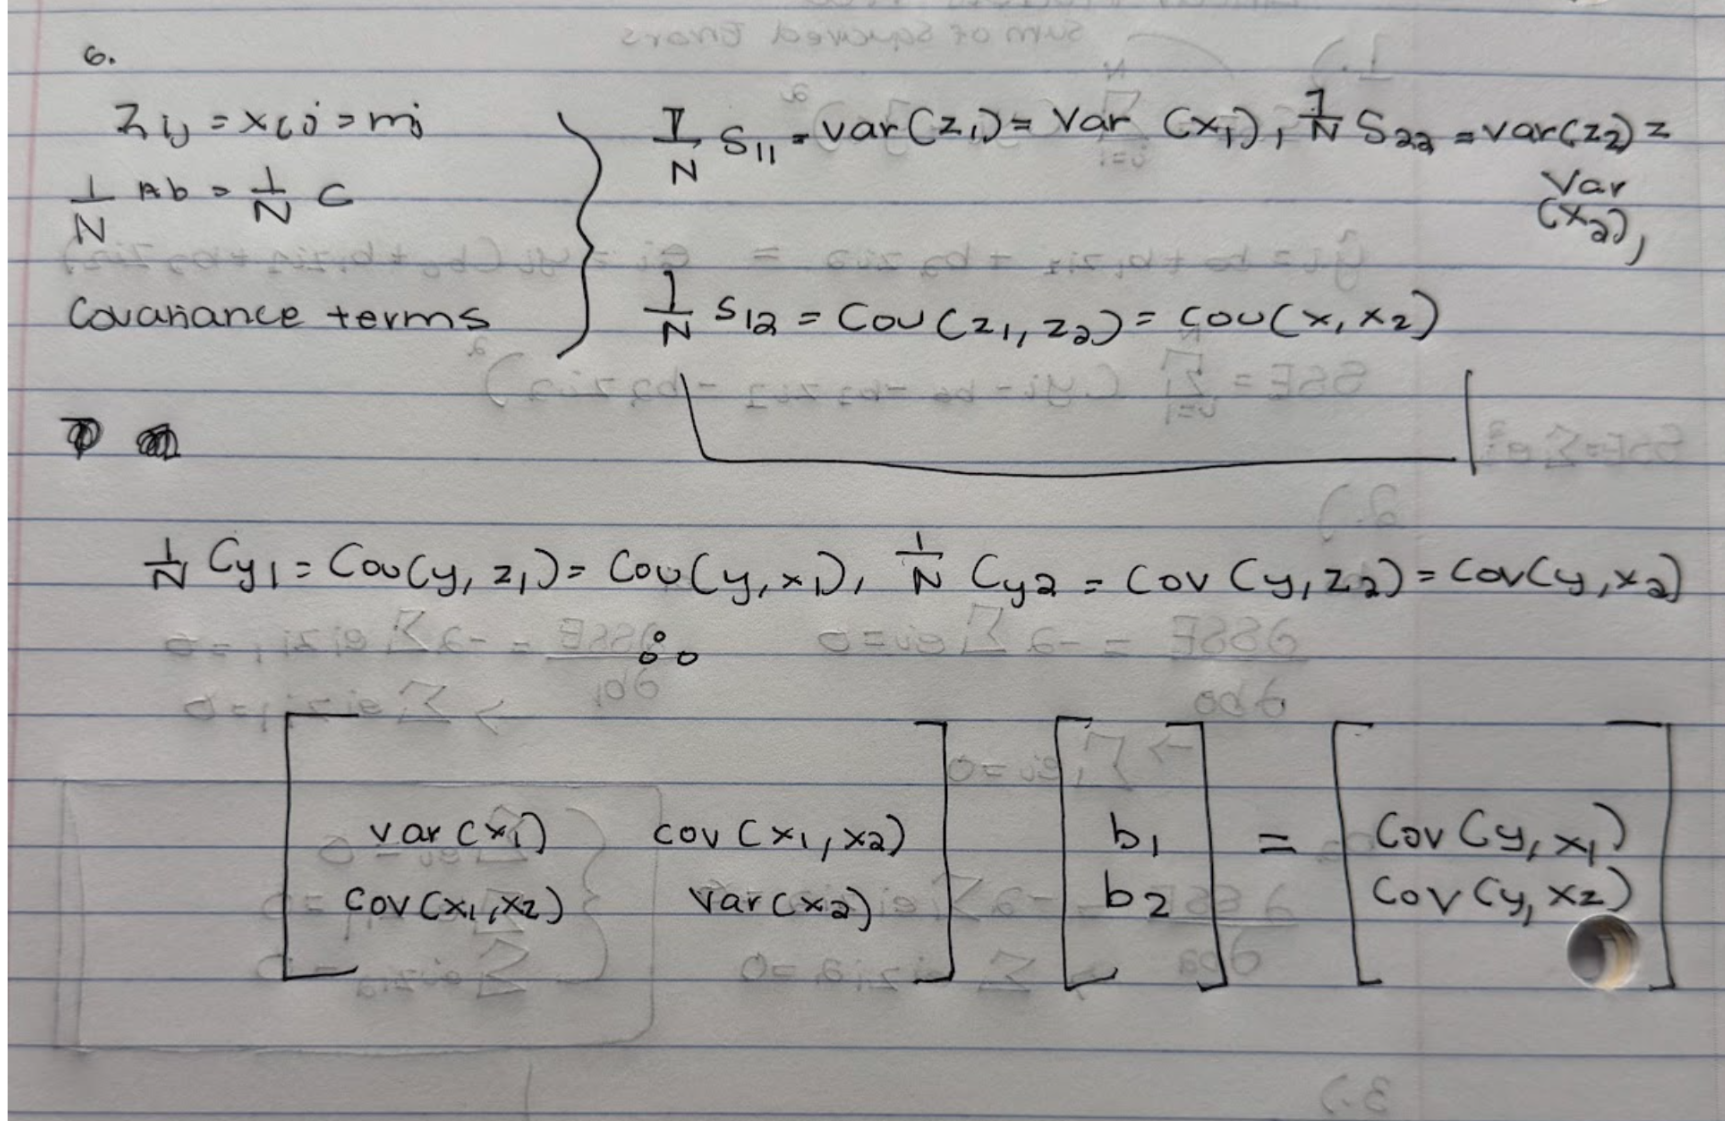

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

In [5]:
import pandas as pd

heart_df = pd.read_csv('/content/heart_hw.csv')
display(heart_df.head())

Unnamed: 0  age transplant  y
0           1   53    control  0
1           2   43    control  0
2           3   52    control  0
3           4   52    control  0
4           5   54    control  0

In [10]:
#3.1
survival_proportions = heart_df.groupby('transplant')['y'].mean()

control_proportion = survival_proportions['control']
treatment_proportion = survival_proportions['treatment']

average_treatment_effect = treatment_proportion - control_proportion

print(f"Proportion of survivors in the control group: {control_proportion:.4f}")
print(f"Proportion of survivors in the treatment group: {treatment_proportion:.4f}")
print(f"Average treatment effect (Treatment - Control): {average_treatment_effect:.4f}")

Proportion of survivors in the control group: 0.1176
Proportion of survivors in the treatment group: 0.3478
Average treatment effect (Treatment - Control): 0.2302


In [52]:
#3.2
import statsmodels.api as sm
import pandas as pd

heart_df['transplant_treatment'] = heart_df['transplant'].apply(lambda x: 1 if x == 'treatment' else 0)

y = heart_df['y']
X = heart_df['transplant_treatment']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.354
Date:                Tue, 07 Oct 2025   Prob (F-statistic):             0.0133
Time:                        02:45:12   Log-Likelihood:                -59.591
No. Observations:                 103   AIC:                             123.2
Df Residuals:                     101   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1176 

In this regression, the numbers line up exactly with what we already calculated in part 3.1.

The intercept (0.1176) is just the survival rate of the control group. When the dummy variable for transplant is 0, that’s the mean of
𝑦
y in the control group, so the regression is literally giving us that number.

The coefficient on transplant (0.2302) is the difference between the survival rate in the treatment group and the survival rate in the control group. That’s exactly the average treatment effect we found before.

Why this happens:
When we have a regression with only a constant and a dummy variable, the regression is just comparing two group means.

The intercept = the average of the group with dummy = 0 (control).

The coefficient = the difference in averages between dummy = 1 (treatment) and dummy = 0 (control).

So in this setup, the regression is really just another way of expressing the same group comparisons we did by hand.

In [53]:
#3.3
import statsmodels.api as sm
import pandas as pd

heart_df['transplant_treatment'] = heart_df['transplant'].apply(lambda x: 1 if x == 'treatment' else 0)

y = heart_df['y']

X = heart_df[['transplant_treatment', 'age']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     8.602
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000357
Time:                        02:45:36   Log-Likelihood:                -54.558
No. Observations:                 103   AIC:                             115.1
Df Residuals:                     100   BIC:                             123.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.7020 

The intercept changed because of the new variable we added to the model. In the earlier regression (Question 3.2), the only predictor was the transplant dummy, so the intercept represented the average survival rate for the control group (when the dummy = 0). That gave us a clear and meaningful interpretation. But in the new model (Question 3.3), we also included age. Now the intercept represents the predicted survival when transplant = 0 and age = 0. Since no one in our dataset has an age of zero, the intercept no longer has a straightforward interpretation in the real-world context, it’s just the predicted value if we set both variables equal to zero. What’s more important in this model are the coefficients. The transplant coefficient tells us the difference in survival between the treatment and control groups, holding age constant. The age coefficient shows how survival changes with each additional year of age, holding transplant status constant. So, the intercept itself doesn’t carry the same meaning anymore, but the inclusion of age lets us separate out and better understand the roles of both transplant and age in predicting survival.

In [ ]:
#3.4

In [54]:
import pandas as pd

# Create a dummy variable for 'transplant' (if not already created)
heart_df['transplant_treatment'] = heart_df['transplant'].apply(lambda x: 1 if x == 'treatment' else 0)

# Display the updated DataFrame to confirm the new column
display(heart_df.head())

Unnamed: 0  age transplant  y  transplant_treatment
0           1   53    control  0                     0
1           2   43    control  0                     0
2           3   52    control  0                     0
3           4   52    control  0                     0
4           5   54    control  0                     0

In [43]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = heart_df[['age', 'transplant_treatment']]
y = heart_df['y']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (82, 2) (82,)
Testing set shape: (21, 2) (21,)


In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=2, include_bias=False)
age_poly_train = poly.fit_transform(X_train[['age']])
age_poly_test = poly.transform(X_test[['age']])

age_poly_train_df = pd.DataFrame(age_poly_train, columns=[f'age_poly_{i+1}' for i in range(age_poly_train.shape[1])], index=X_train.index)
age_poly_test_df = pd.DataFrame(age_poly_test, columns=[f'age_poly_{i+1}' for i in range(age_poly_test.shape[1])], index=X_test.index)


X_train_flexible = age_poly_train_df.copy()
X_test_flexible = age_poly_test_df.copy()

for col in age_poly_train_df.columns:
    X_train_flexible[f'{col}_x_transplant'] = X_train_flexible[col] * X_train['transplant_treatment']
    X_test_flexible[f'{col}_x_transplant'] = X_test_flexible[col] * X_test['transplant_treatment']

X_train_flexible['transplant_treatment'] = X_train['transplant_treatment']
X_test_flexible['transplant_treatment'] = X_test['transplant_treatment']



model_flexible = LinearRegression()
model_flexible.fit(X_train_flexible, y_train)

print("Model training complete.")

Model training complete.


In [49]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model_flexible.predict(X_test_flexible)

r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R-squared on the test set: {r2:.4f}")
print(f"RMSE on the test set: {rmse:.4f}")

R-squared on the test set: 0.1812
RMSE on the test set: 0.4266


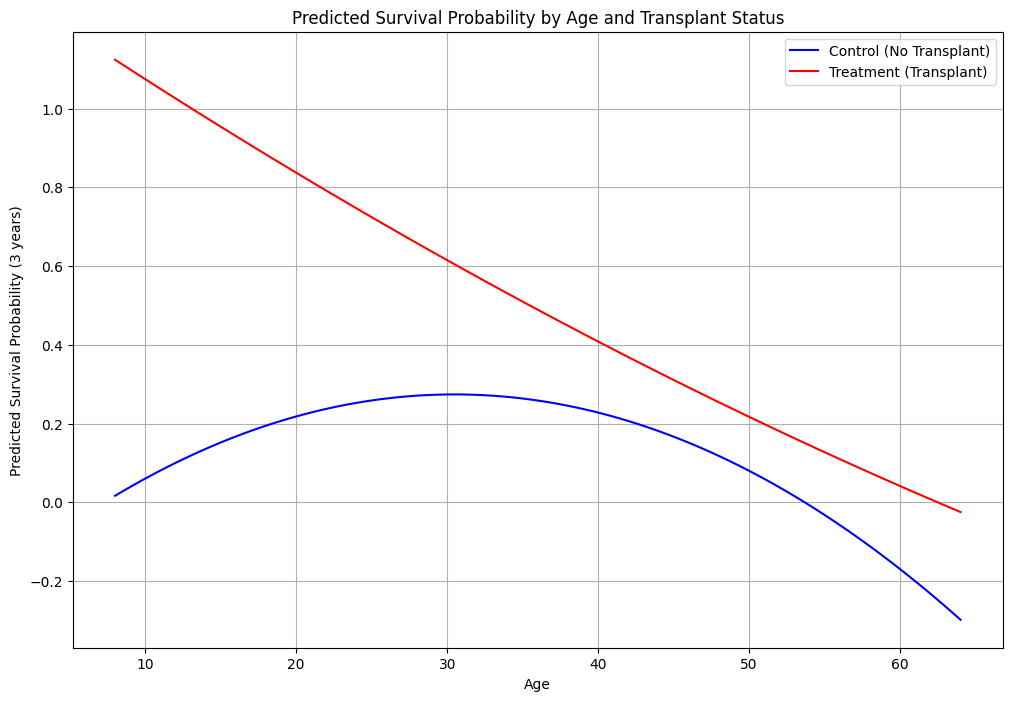

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a range of ages for prediction
age_range = np.linspace(heart_df['age'].min(), heart_df['age'].max(), 100) # Removed reshape(-1, 1) for now
age_range_df = pd.DataFrame(age_range, columns=['age']) # Create a DataFrame with feature name

# Generate polynomial features for the age range using the already fitted poly object
age_range_poly = poly.transform(age_range_df) # Transform the DataFrame
age_poly_columns = [f'age_poly_{i+1}' for i in range(age_range_poly.shape[1])]

# Define a function to create prediction DataFrame with correct columns
def create_prediction_df(age_poly_data, transplant_status, training_columns):
    """Creates a DataFrame for prediction with polynomial age, interactions, and transplant status."""
    df = pd.DataFrame(age_poly_data, columns=age_poly_columns)

    # Add interaction terms
    for col in age_poly_columns:
        df[f'{col}_x_transplant'] = df[col] * transplant_status

    # Add transplant status column
    df['transplant_treatment'] = transplant_status

    # Ensure column order matches training data
    return df[training_columns]

# Create prediction DataFrames for control and treatment groups
X_predict_control = create_prediction_df(age_range_poly, 0, X_train_flexible.columns)
X_predict_treatment = create_prediction_df(age_range_poly, 1, X_train_flexible.columns)

# Predict survival probability for both groups
predicted_survival_control = model_flexible.predict(X_predict_control)
predicted_survival_treatment = model_flexible.predict(X_predict_treatment)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(age_range, predicted_survival_control, label='Control (No Transplant)', color='blue')
plt.plot(age_range, predicted_survival_treatment, label='Treatment (Transplant)', color='red')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability (3 years)')
plt.title('Predicted Survival Probability by Age and Transplant Status')
plt.legend()
plt.grid(True)
plt.show()

The model shows that age and transplant status both play an important role in predicting survival. As age increases, the predicted probability of survival decreases for both the control and treatment groups, which makes sense because older patients are generally less likely to survive. Since our model includes non-linear terms, this decline is not just a straight line but can bend or curve, reflecting how the effect of age changes at different points in life. Looking at transplant, the treatment group line (red) sits above the control group line (blue) across most ages. This means that, holding age constant, receiving a transplant is associated with a higher chance of survival. Finally, the gap between the two lines changes as age changes. The benefit of a transplant looks stronger for younger patients, but as age gets very high, that benefit seems to shrink and may even disappear. This happens because the interaction terms in the model let the effect of transplant depend on age. Overall, the plot suggests that survival decreases with age, transplants improve survival, and the advantage of a transplant is greatest at younger ages.

3.5
One of my biggest concerns is data bias. If the model is trained on historical data that already reflects unequal access to healthcare, then the model will just repeat those inequalities. For example, if certain groups had less access to treatment or worse outcomes in the past, the model could learn that pattern and unfairly predict lower chances of survival for those groups, even if it’s not actually true. That would make an already unfair system even worse.

Another concern is transparency. This kind of model could end up being a “black box,” especially if it uses complex interactions and non-linear terms. If patients and families don’t understand how decisions are being made, it would be really hard to justify why one person gets an organ over another. In something as high-stakes as transplants, people deserve to know the reasoning behind the decision.

So for me, the main issues are about fairness in the data that goes into the model and making sure the process stays clear and accountable to the public. Without that, I don’t think people would trust or accept a system like this.